# Google Local Data (2021)

**Citation**

**UCTopic: Unsupervised Contrastive Learning for Phrase Representations and Topic Mining**  
Jiacheng Li, Jingbo Shang, Julian McAuley  
*Annual Meeting of the Association for Computational Linguistics (ACL)*, 2022  
[pdf](https://aclanthology.org/2022.acl-long.426.pdf)


**Personalized Showcases: Generating Multi-Modal Explanations for Recommendations**  
An Yan, Zhankui He, Jiacheng Li, Tianyang Zhang, Julian Mcauley  
*The 46th International ACM SIGIR Conference on Research and Development in Information Retrieval (SIGIR)*, 2023  
[pdf](https://arxiv.org/pdf/2207.00422.pdf)

**Data Source**

The Google Local Dataset offers a comprehensive collection from Google Local (Google Maps), featuring 65,000 restaurants and over 1.77 million reviews, along with 4.43 million images posted by approximately 1.01 million users. It contains detailed information such as geographical location, business category,
opening status, price levels, and average ratings for each restaurant. This multi-modal dataset
includes textual reviews, user-generated images, and various metadata attributes, providing a
comprehensive foundation for analyzing consumer preferences and behaviors in the context of
restaurant recommendations.

For our project, we decided to focus on the resturants in Massachusetts, which includes 5,624,944 reviews and 92,520 businesses in metadata.

*Massachusetts 10-cores Review Dataset*
(https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/googlelocal/)

*Masechusetts Metadata*
(https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/googlelocal/)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
review_ma = pd.read_json('data/review-Massachusetts_10.json', lines=True)
metadata_ma = pd.read_json('data/meta-Massachusetts.json', lines=True)

# Filter out restaurants based on business category
restaurant_ma = metadata_ma[metadata_ma['category'].apply(lambda x: 'Restaurant' in x if isinstance(x, list) else False)]

data_ma = pd.merge(review_ma, restaurant_ma, on='gmap_id', how='inner')
data_ma.to_csv("data/data_ma.csv", index=False)
print("Number of restaurant reviews in MA:", len(data_ma))

Number of restaurant reviews in MA: 1253377


Since the complete Massachusetts review data is 3.03GB and even reading the file takes too long, we use the reduced **10-core review data** (1.44GB). We think this is reasonable because it ensures a **sufficient level of interaction data** for each entity, enabling more reliable and robust analysis or model training.

We also narrow down the **metadata** to include only entities classified as restaurants, ensuring we consider only relevant businesses. 

We then merge this filtered metadata with the review data based on the gmap_id field, which acts as a common identifier between the two datasets, using an inner join. The result is saved as a CSV file, creating a dataset that is more manageable in size and more focused for analysis or model training, containing over 1.25 million reviews of restaurants in Massachusetts.

## Summary of the Data

In [4]:
data_ma = pd.read_csv("data/data_ma.csv")
data_ma.count()

user_id             1253377
name_x              1253368
time                1253377
rating              1253377
text                 660093
pics                  39142
resp                  91511
gmap_id             1253377
name_y              1253377
address             1252947
description         1072793
latitude            1253377
longitude           1253377
category            1253377
avg_rating          1253377
num_of_reviews      1253377
price               1143581
hours               1223481
MISC                1246033
state                633735
relative_results    1240717
url                 1253377
dtype: int64

In [5]:
print(data_ma.dtypes)
n_users = data_ma['user_id'].nunique()
n_rest = data_ma['gmap_id'].nunique()
print("Number of Users: {}".format(n_users))
print("Number of Restaurants: {}".format(n_rest))

user_id             float64
name_x               object
time                  int64
rating                int64
text                 object
pics                 object
resp                 object
gmap_id              object
name_y               object
address              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object
Number of Users: 188265
Number of Restaurants: 5893


Our merged dataset comprises 1,253,377 observations and 22 columns, with reviews from 188,265 distinct users for 5,893 different restaurants. For our upcoming NLP tasks, we plan to consider the following features:

* `user_id`: The ID of the user (categorical variable)
* `rating`: The rating given by a user to a restaurant (numerical)
* `text`: The review text (textual data)
* `gmap_id`: The ID of the restaurant (categorical variable)
* `latitude`: The latitude of the restaurant (numerical)
* `longitude`: The longitude of the restaurant (numerical)
* `num_of_reviews`: The number of reviews for a restaurant (numerical)
* `price`: The price index of the restaurant, ranging from $ to $$$$ (categorical variable)

## Data Preprocessing

In [20]:
# drop irrelevent columns


df_cleaned = data_ma[['user_id', 'name_y', 'rating', 'text', 'gmap_id', 'latitude', 'longitude', 'num_of_reviews', 'price', 'avg_rating']]

df_cleaned.head()
print(df_cleaned.isnull().any())


user_id           False
name_y            False
rating            False
text               True
gmap_id           False
latitude          False
longitude         False
num_of_reviews    False
price              True
avg_rating        False
dtype: bool


In [21]:
print(f"Percentage of missing review text: {df_cleaned['text'].isna().sum()/len(df_cleaned)*100:.2f}%")
print(f"Percentage of reviews with missing values in 'price' column: {df_cleaned['price'].isna().sum()/len(df_cleaned)*100:.2f}%")

Percentage of missing review text: 47.33%
Percentage of reviews with missing values in 'price' column: 8.76%


In [22]:
# drop missing values
df_cleaned= df_cleaned.dropna()
df_cleaned


,user_id,name_y,rating,text,gmap_id,latitude,longitude,num_of_reviews,price,avg_rating
52,1.089326e+20,Honey Dew Donuts,5,Love the Sale Associates But The Machines I do...,0x89e45e492eda50b1:0x666de2dcb5417546,41.902888,-71.249229,18,$,4.4
53,1.089326e+20,Honey Dew Donuts,5,Love the Sale Associates But The Machines I do...,0x89e45e492eda50b1:0x666de2dcb5417546,41.902888,-71.249229,18,$,4.4
54,1.091153e+20,Honey Dew Donuts,3,Good for a short stop,0x89e45e492eda50b1:0x666de2dcb5417546,41.902888,-71.249229,18,$,4.4
55,1.091153e+20,Honey Dew Donuts,3,Good for a short stop,0x89e45e492eda50b1:0x666de2dcb5417546,41.902888,-71.249229,18,$,4.4
56,1.170102e+20,Honey Dew Donuts,5,My favorite coffee place around. Friendly staf...,0x89e45e492eda50b1:0x666de2dcb5417546,41.902888,-71.249229,18,$,4.4
...,...,...,...,...,...,...,...,...,...,...
1253292,1.066413e+20,Martha's Vineyard Chowder Company,5,Great food wonderful people,0x89e5290944643609:0x6b5cbf7224fe52bc,41.457841,-70.557289,445,$$,4.4
1253293,1.155822e+20,Martha's Vineyard Chowder Company,4,Good chowder,0x89e5290944643609:0x6b5cbf7224fe52bc,41.457841,-70.557289,445,$$,4.4
1253294,1.101792e+20,Martha's Vineyard Chowder Company,5,The chowder actually is exceptionally delicious.,0x89e5290944643609:0x6b5cbf7224fe52bc,41.457841,-70.557289,445,$$,4.4
1253295,1.052239e+20,Martha's Vineyard Chowder Company,5,"(Translated by Google) Nice service, great ser...",0x89e5290944643609:0x6b5cbf7224fe52bc,41.457841,-70.557289,445,$$,4.4


In [31]:
df_cleaned.price.value_counts()

price
$$      335103
$       232850
$$$      19664
₩₩        7571
$$$$      2368
₩         1738
₩₩₩        974
Name: count, dtype: int64

In [37]:
# drop rows with price as value '₩₩', '₩',   '₩₩₩₩'   
df_cleaned = df_cleaned[~df_cleaned['price'].isin(['₩₩', '₩', '₩₩₩₩', '₩₩₩'])]
df_cleaned.price.value_counts()

price
$$      335103
$       232850
$$$      19664
$$$$      2368
Name: count, dtype: int64

In [89]:

!pip install gensim
!pip install nltk
import os.path
from gensim import corpora
from gensim.models import LsiModel
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

lemmer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\w+')
stopwords = stopwords.words('english')

# preprocess text function
def preprocess_tokenize_text(text):

  # remove words such as (Original), (Translated by Google), etc, which were generated by google and are not part of the reviews
  text = re.sub(r'\(Original\)', '', text)
  text = re.sub(r'\(Translated by Google\)', '', text)
  # convert to lowercase
  text = text.lower()
  # remove punctuation
  text = re.sub(r'[^\w\s]', '', text)

  # convert to tokens
  tokens = tokenizer.tokenize(text)
  # return tokens after stopwords have been removed
  tokens = [word for word in tokens if (word not in stopwords)]
  # lemmatize
  tokens = [lemmer.lemmatize(w) for w in tokens]
  # remove single letter tokens
  tokens = [w for w in tokens if len(w)>1]
  return tokens

df_cleaned['text_token'] = df_cleaned['text'].apply(preprocess_tokenize_text)

df_cleaned.head()

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will 

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cassiedai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/cassiedai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/cassiedai/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/cassiedai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cassiedai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,user_id,name_y,rating,text,gmap_id,latitude,longitude,num_of_reviews,price,avg_rating,text_token
52,1.089326e+20,Honey Dew Donuts,5,Love the Sale Associates But The Machines I do...,0x89e45e492eda50b1:0x666de2dcb5417546,41.902888,-71.249229,18,$,4.4,"[love, sale, associate, machine, dont, think, ..."
53,1.089326e+20,Honey Dew Donuts,5,Love the Sale Associates But The Machines I do...,0x89e45e492eda50b1:0x666de2dcb5417546,41.902888,-71.249229,18,$,4.4,"[love, sale, associate, machine, dont, think, ..."
54,1.091153e+20,Honey Dew Donuts,3,Good for a short stop,0x89e45e492eda50b1:0x666de2dcb5417546,41.902888,-71.249229,18,$,4.4,"[good, short, stop]"
55,1.091153e+20,Honey Dew Donuts,3,Good for a short stop,0x89e45e492eda50b1:0x666de2dcb5417546,41.902888,-71.249229,18,$,4.4,"[good, short, stop]"
56,1.170102e+20,Honey Dew Donuts,5,My favorite coffee place around. Friendly staf...,0x89e45e492eda50b1:0x666de2dcb5417546,41.902888,-71.249229,18,$,4.4,"[favorite, coffee, place, around, friendly, st..."


## Exploratory Data Analysis & Visualization

In [39]:
df_cleaned['num_of_reviews'].describe()

count    589985.000000
mean        759.034328
std         627.396026
min           8.000000
25%         357.000000
50%         608.000000
75%         963.000000
max        5694.000000
Name: num_of_reviews, dtype: float64

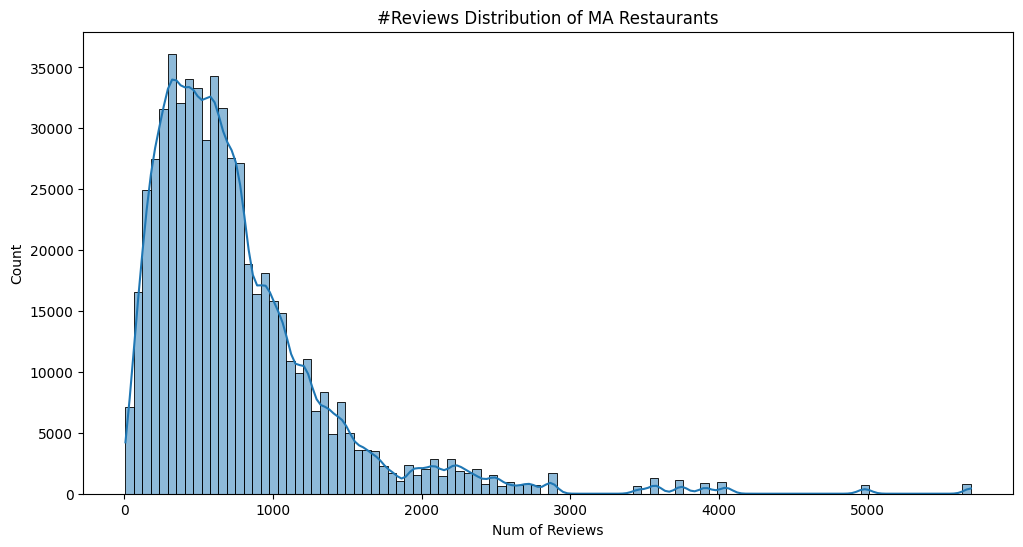

In [40]:
plt.figure(figsize=(12, 6))
# sns.countplot(x='num_of_reviews', data=restaurant_ma)
sns.histplot(df_cleaned['num_of_reviews'], bins=100, kde=True)
plt.title('#Reviews Distribution of MA Restaurants')
plt.xlabel('Num of Reviews')
plt.ylabel('Count')
# plt.xticks(rotation=45)
# Show only a subset of ticks to avoid overcrowding
# ticks = plt.gca().get_xticks()
# plt.gca().set_xticks(ticks[::50])
plt.show()

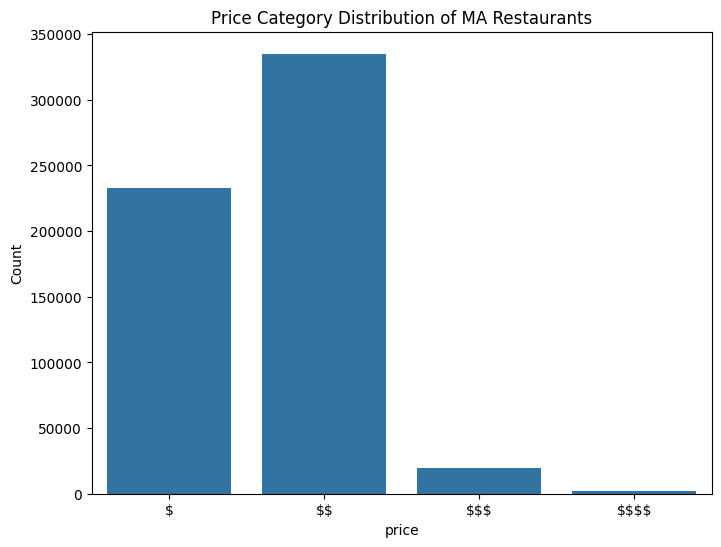

In [41]:
plt.figure(figsize=(8, 6))

valid_prices = df_cleaned['price'].astype(str)
price_lengths = valid_prices.apply(len)

sns.countplot(x=price_lengths)
plt.title('Price Category Distribution of MA Restaurants')
xticklabels = [r'{}'.format('\$' * p) for p in sorted(price_lengths.unique())]
plt.xticks(range(len(xticklabels)), xticklabels) 
plt.ylabel('Count')
plt.show()

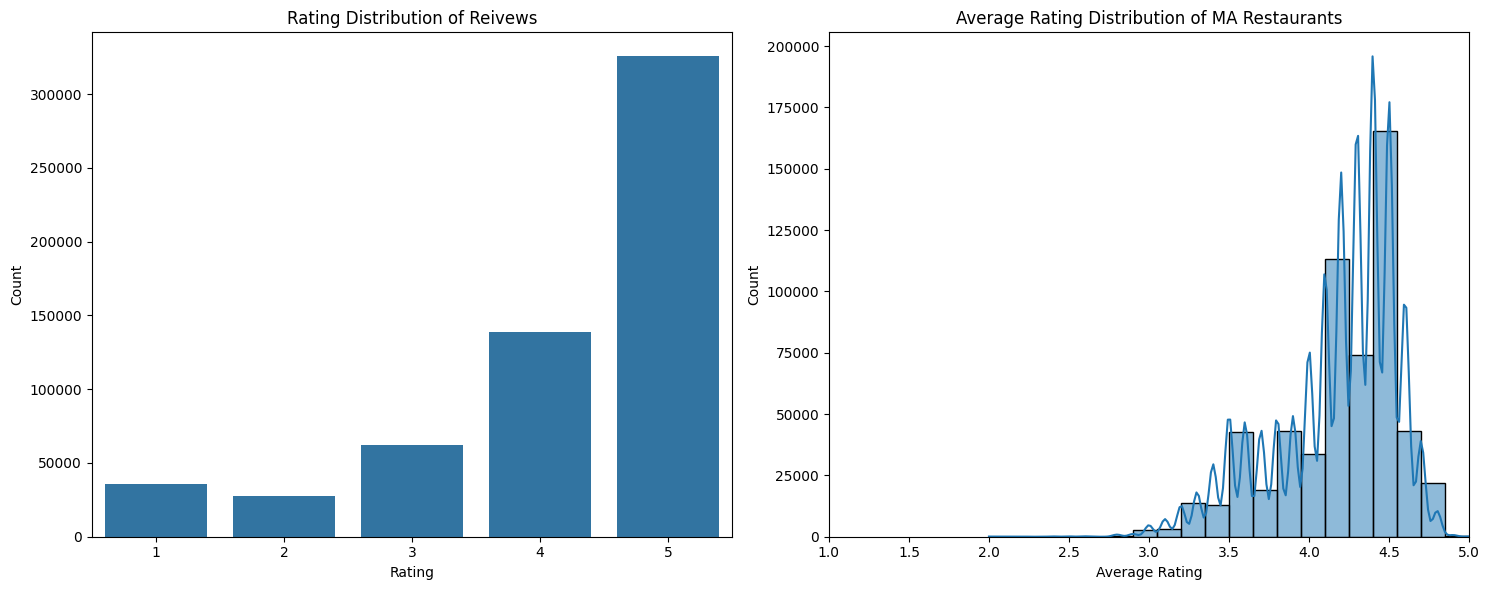

In [42]:
# Visualize Rating Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Review Rating Distribution
sns.countplot(x='rating', data=df_cleaned, ax=axes[0])
axes[0].set_title('Rating Distribution of Reivews')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')

# Plot Average Rating of Restaurants
sns.histplot(df_cleaned['avg_rating'], ax=axes[1], bins=20, kde=True)
axes[1].set_title('Average Rating Distribution of MA Restaurants')
axes[1].set_xlabel('Average Rating')
axes[1].set_xlim([1,5])
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Wordcloud

In [14]:
!pip install wordcloud

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [43]:
from wordcloud import WordCloud

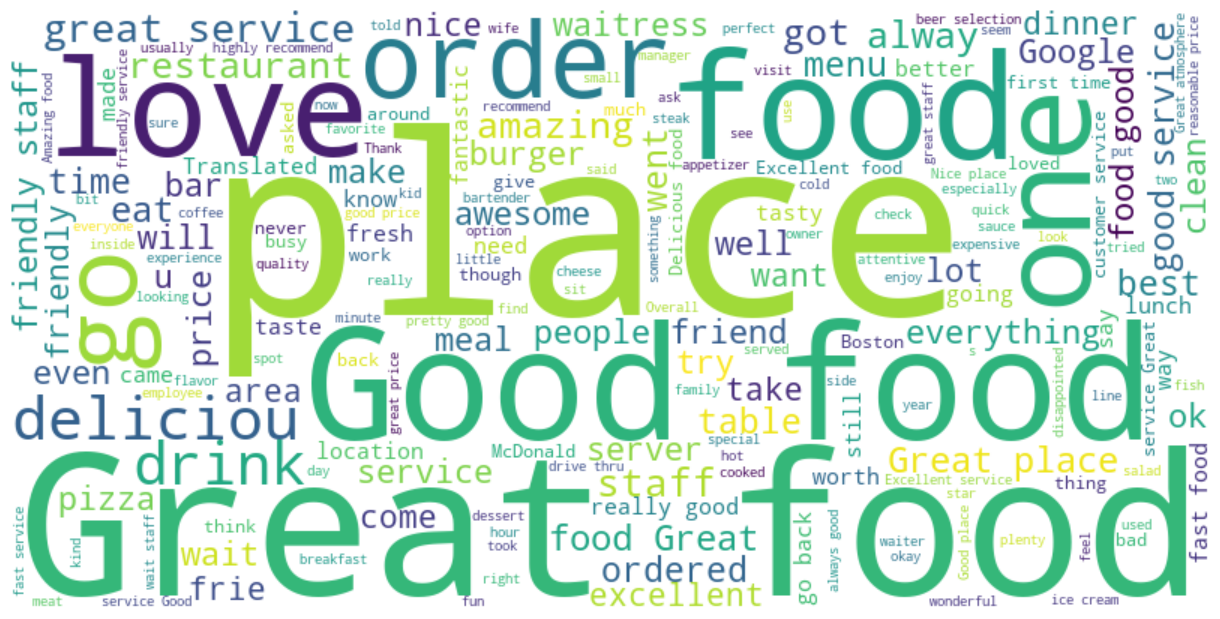

In [45]:
all_text = ' '.join(review for review in data_ma[-data_ma['text'].isna()].text)
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize = (12, 6), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Topic Analysis For Restaurant Reviews by Rating

In [85]:
# combine the review text for each rating
df_by_rating = df_cleaned[['gmap_id', 'price', 'rating','user_id', 'text']]


df_rating_combined = df_by_rating.groupby('rating')['text'].apply(' '.join).reset_index()

df_rating_combined ['text'] = df_rating_combined ['text'].str.replace(r'\(Original\)', '', regex=True)

df_rating_combined ['text'] = df_rating_combined ['text'].str.replace(r'\(Translated by Google\)', '', regex=True)


df_rating_combined.head()

,rating,text
0,1,I can't believe I acually waited the half hour...
1,2,Not much flavor As someone who has both eaten ...
2,3,Good for a short stop Good for a short stop Gr...
3,4,Nice pastry is Ward of the money coffee good N...
4,5,Love the Sale Associates But The Machines I do...


In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA


bow_vectorizer = CountVectorizer(stop_words=stopwords, lowercase=True)

# Iterate over each price group
for rating, group in df_rating_combined.groupby('rating'):
    print(f"Topics for Rating: {rating}")
    
    # Vectorize the text for the current price group
    bow_matrix = bow_vectorizer.fit_transform(group['text'].values.tolist())
    
    # Fit LDA model
    lda_bow = LDA(n_components=3, random_state=42)
    lda_bow.fit(bow_matrix)



    
    # Print the top words for each topic
    for idx, topic in enumerate(lda_bow.components_):
        print(f"Top words in Topic #{idx}:")
        print([bow_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-7:]])
    print('')


Topics for Rating: 1
Top words in Topic #0:
['never', 'get', 'time', 'place', 'order', 'service', 'food']
Top words in Topic #1:
['neighborhoods', 'carve', 'cartões', 'nenes', 'neoneit', 'neglects', '흔히들']
Top words in Topic #2:
['neighborhoods', 'carve', 'cartões', 'nenes', 'neoneit', 'neglects', '흔히들']

Topics for Rating: 2
Top words in Topic #0:
['time', 'like', 'order', 'place', 'good', 'service', 'food']
Top words in Topic #1:
['compelling', 'noodling', 'compelled', 'nooone', 'norcross', 'nonstop', '했더니']
Top words in Topic #2:
['compelling', 'noodling', 'compelled', 'nooone', 'norcross', 'nonstop', '했더니']

Topics for Rating: 3
Top words in Topic #0:
['khorma', 'kiask', 'kibbee', 'kibbi', 'kibby', 'kerry', '𝓷𝓮𝓮𝓭']
Top words in Topic #1:
['like', 'ok', 'great', 'place', 'service', 'good', 'food']
Top words in Topic #2:
['khorma', 'kiask', 'kibbee', 'kibbi', 'kibby', 'kerry', '𝓷𝓮𝓮𝓭']

Topics for Rating: 4
Top words in Topic #0:
['kaiju', 'kahuna', 'kahlua', 'kafka', 'kaffir', 'kamat

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords, lowercase=True, max_features=1000)

# Iterate over each price group
for rating, group in df_rating_combined.groupby('rating'):
    print(f"Topics for Rating: {rating}")
    
    # Vectorize the text for the current price group using TF-IDF
    tfidf_matrix = tfidf_vectorizer.fit_transform(group['text'].values.tolist())
    
    # Fit LDA model
    lda_tfidf = LDA(n_components=3, random_state=42)
    lda_tfidf.fit(tfidf_matrix)
    
    # Print the top words for each topic
    for idx, topic in enumerate(lda_tfidf.components_):
        print(f"Top words in Topic #{idx}:")
        print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-7:]])
    print('')

Topics for Rating: 1
Top words in Topic #0:
['never', 'get', 'time', 'place', 'food', 'order', 'service']
Top words in Topic #1:
['never', 'get', 'time', 'place', 'food', 'order', 'service']
Top words in Topic #2:
['never', 'get', 'time', 'place', 'order', 'service', 'food']

Topics for Rating: 2
Top words in Topic #0:
['time', 'like', 'order', 'place', 'food', 'good', 'service']
Top words in Topic #1:
['time', 'like', 'order', 'place', 'good', 'service', 'food']
Top words in Topic #2:
['time', 'like', 'order', 'place', 'food', 'good', 'service']

Topics for Rating: 3
Top words in Topic #0:
['like', 'ok', 'great', 'place', 'food', 'good', 'service']
Top words in Topic #1:
['like', 'ok', 'great', 'place', 'service', 'good', 'food']
Top words in Topic #2:
['like', 'ok', 'great', 'place', 'food', 'good', 'service']

Topics for Rating: 4
Top words in Topic #0:
['staff', 'nice', 'place', 'good', 'food', 'service', 'great']
Top words in Topic #1:
['staff', 'nice', 'place', 'service', 'great'

## Meaningful Insights

### Missingness
Having 660,100 rows with review text is indeed a substantial amount of data for our subsequent NLP tasks. It's important to note that text data is inherently qualitative and context-dependent, making it challenging to accurately impute missing values. Therefore, it's reasonable to proceed with non-null review text when incorporating NLP techniques

While location can be a factor in determining the price range of a restaurant, it's not the sole determinant. Other factors such as the quality of food, ambiance, service, and overall reputation also play significant roles. Therefore, our first thought of imputing the missing price indicators solely based on longitude and latitude may not accurately reflect the true price range of the restaurants.

With only 8.76% of reviews having missing values in the 'price' column, the overall impact on the analysis may be limited.

Instead of imputing missing price indicators, an alternative approach could be to incorporate the price information directly into the text data. By concatenating the price indicator into the review text, such as **"the price is '$$$'"**, we can ensure that this information is captured and utilized in subsequent analyses.

### Data Imbalance
From the plots above, we can see that the rating distribution is left-skewed, meaning that a majority of reviewers give higher ratings. The price index distribution is predominantly concentrated around \$ and \$$, indicating that more reviews are available for restaurants in the affordable price range. While there is some imbalance in the dataset, it is not a significant concern for this project, which aims to construct a restaurant recommendation system based on review text rather than performing classification tasks.

### Feature Scaling 
In this project, we will not apply feature scaling to our numerical features, including latitude, longitude, and ratings to maintain the interpretability of our recommendation system.


### Topic Analysis
We conducted topic analysis for review texts by different ratings, hoping to capture what aspects of restaurants are important for customers for them to give high ratings in order to gain some insights about our recommondation system. The topic analysis using TF-IDF reveals more informative results than the one using count vector. We can tell that while the higher ratiing seems to have more positive words in their top topics, and that service/food/place are top words in multiple top topics for different ratings, suggesting that service/food/place are indeed important aspects for customers and thus are useful for our recommondation system.

## Summary of Findings

## Revised Project Question

## Baseline Model